<font size=6>**Tests of Normality**</font>

___

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats

rng = np.random.default_rng(seed=42)

In [2]:
rng.normal(size=10)

array([ 0.30471708, -1.03998411,  0.7504512 ,  0.94056472, -1.95103519,
       -1.30217951,  0.1278404 , -0.31624259, -0.01680116, -0.85304393])

# Interpreting Normal Probability Plots

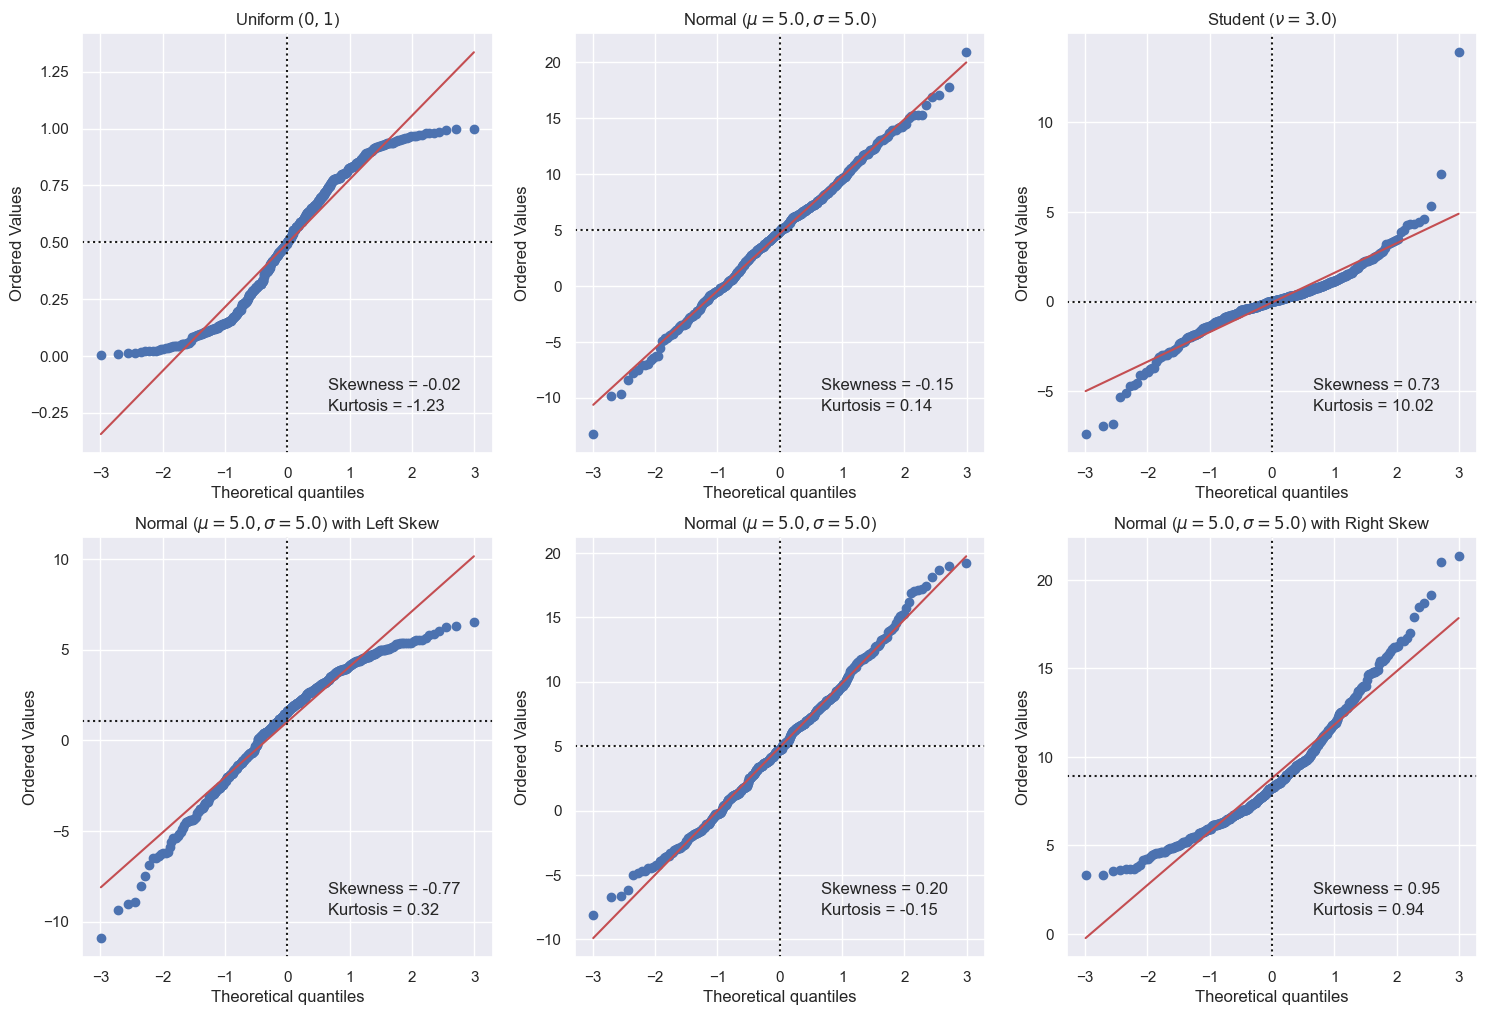

In [3]:
def identify_kurtosis():
    SAMPLE_SIZE = 500
    dists = [stats.uniform, stats.norm, stats.t, stats.skewnorm, stats.norm, stats.skewnorm]
    mu, sigma = 5, 5
    nu = 3
    skew_param = 5
    arguments = [{},
                 {'loc': mu, 'scale': sigma},
                 {'df': nu},
                 {'loc': mu, 'scale': sigma, 'a': -skew_param},
                 {'loc': mu, 'scale': sigma},
                 {'loc': mu, 'scale': sigma, 'a': skew_param}
                 ]
    
    samples = [dist.rvs(**args, size=SAMPLE_SIZE, random_state=rng) for dist, args in zip(dists, arguments)]

    text_norm = fr"Normal ($\mu={mu:.1f},\sigma={sigma:.1f}$)"
    names = [r"Uniform ($0,1$)",
             text_norm,
             fr"Student ($\nu={nu:.1f}$)",
             text_norm+" with Left Skew",
             text_norm,
             text_norm+" with Right Skew"
             ]
    # theoretical mean
    means = [dist.stats(**args, moments='m') for dist, args in zip(dists, arguments)]
    # sample moments
    skews = [stats.skew(s) for s in samples]
    kurt = [stats.kurtosis(s) for s in samples]

    fig, axs = plt.subplots(2, 3, figsize=(18,12))
    for ax, samp, n, m, sk, k in zip(axs.ravel(), samples, names, means, skews, kurt):
        res = stats.probplot(samp, plot=ax)
        ax.axhline(m, c='k', ls=':')
        ax.axvline(0, c='k', ls=':')
        ax.text(x=0.6, y=0.15, s=f"Skewness = {sk:.2f}", transform=ax.transAxes)
        ax.text(x=0.6, y=0.1, s=f"Kurtosis = {k:.2f}", transform=ax.transAxes)
        ax.set_title(n)

identify_kurtosis()

# Import data

In [4]:
returns = pd.read_excel('returns.xlsx').set_index('Date')
returns.head()

,Bond,Commo,SP500,CorpBondLT,CorpBondST
Date,,,,,
2020-01-03,0.010708,0.013505,-0.007572,0.007082,0.001358
2020-01-06,-0.005199,0.000000,0.003815,-0.004395,0.000739
2020-01-07,-0.003945,-0.003029,-0.002812,-0.005003,-0.001108
2020-01-08,-0.004356,-0.018834,0.005329,-0.003747,-0.000617
2020-01-09,0.004176,-0.007430,0.006781,0.007521,0.000617


*Summary statistics using* `scipy.stats`

Use `scipy.stats.describe`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html

In [5]:
def print_description(ret):
    d = stats.describe(ret)
    moments = [100*d.mean, 100*(d.variance)**(0.5), d.skewness, d.kurtosis]
    index = ["mean (%)", "volatility (%)", "skewness", "kurtosis"]
    return pd.DataFrame(data=moments, columns=ret.columns, index=index)

print_description(returns)

,Bond,Commo,SP500,CorpBondLT,CorpBondST
mean (%),-0.008813,0.035137,0.062100,-0.002675,0.007878
volatility (%),0.920940,1.568913,1.323178,1.023860,0.278585
skewness,-0.532338,-1.090558,-0.542326,0.255083,-1.364180
kurtosis,6.335586,7.573320,11.449124,18.645244,62.230002


# Normal Probability plot

Use `scipy.stats.probplot` to draw a Normal Probabiliity plot of `x`.\
<https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html>\
Note that you need to capture the output of the `probplot()` function to avoid cluttering your screen. Here we save this output in the variable `res`.

In [6]:
x = returns['SP500']

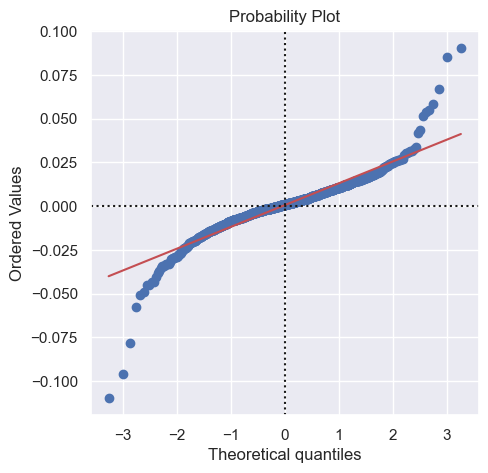

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
res = stats.probplot(x, plot=ax)
ax.axhline(0, c='k', ls=':')
ax.axvline(0, c='k', ls=':');

# Q-Q Plot with Student's t distribution  

The parameters of the reference distribution function are given by the parameter `sparams`.

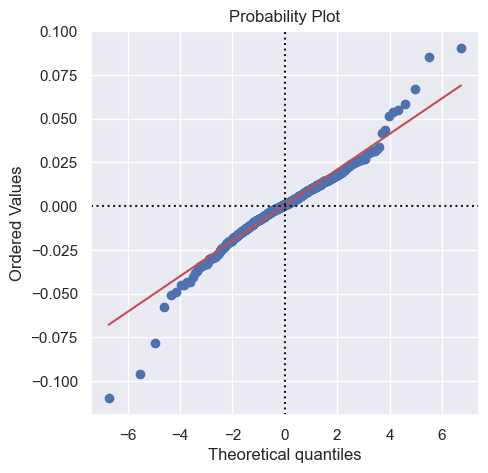

In [8]:
fig, ax = plt.subplots(figsize=(5,5))
res = stats.probplot( x, dist="t", sparams=(5,), plot=ax)
ax.axhline(0, c='k', ls=':')
ax.axvline(0, c='k', ls=':');

Using `scipy.stats.probplot`, draw three Q-Q plots versus the Student's $t$ distribution with the degrees of freedom given in the *list*.

In [9]:
# Testing enumerate() functionality
df_list = [2, 3, 5]
for tuple in enumerate(df_list):
    print(tuple)

(0, 2)
(1, 3)
(2, 5)


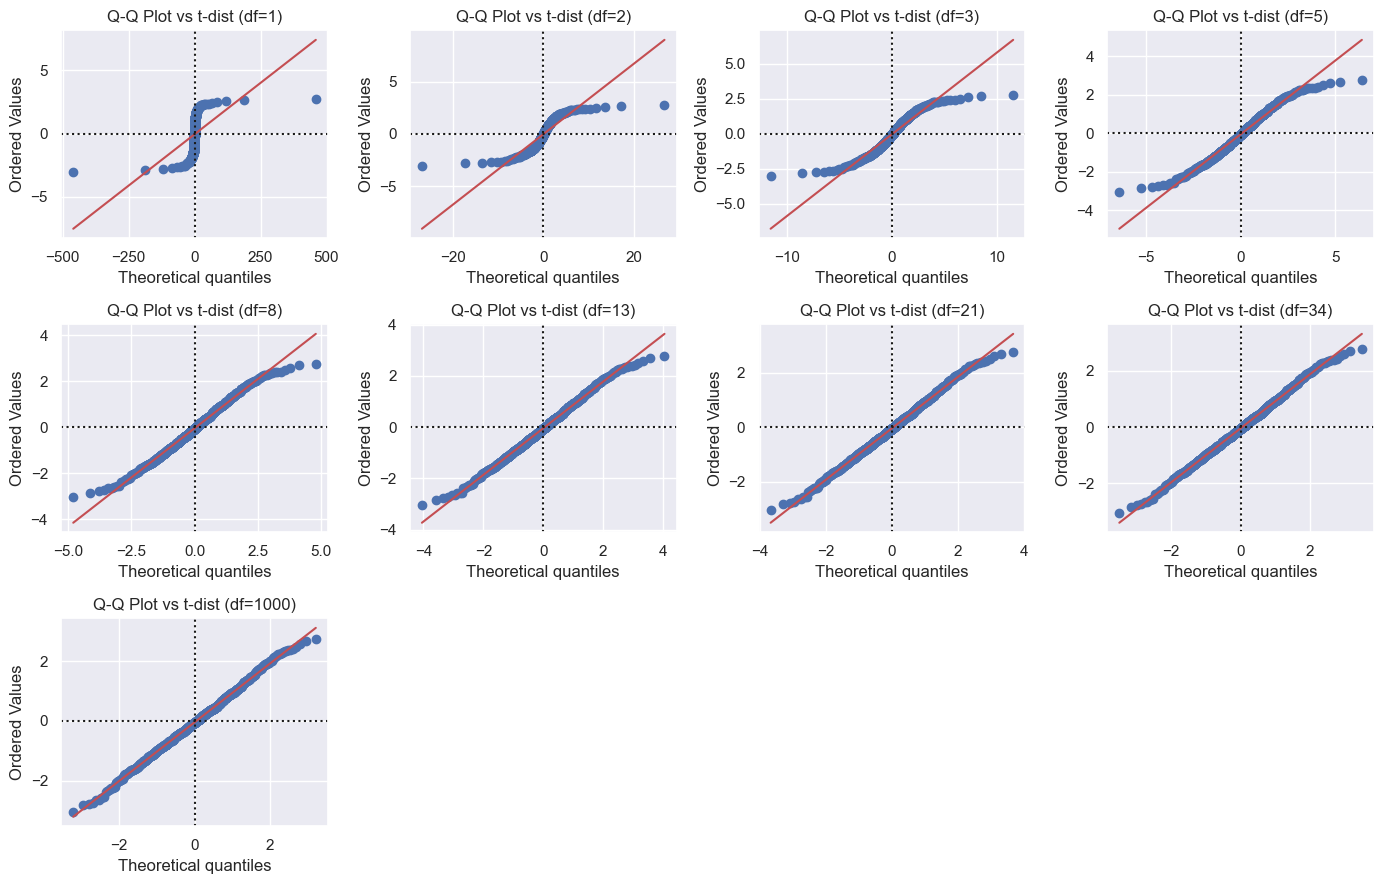

In [12]:
# Example lists of degrees of freedom
df_list = [1, 2, 3, 5, 8, 13, 21, 34, 1000]
#df_list = [1, 2, 3, 5, 8, 13, 21]
#df_list = [1, 2, 3]

# Generate some data from a normal distribution
np.random.seed(0)
data = np.random.normal(0, 1, 1000)

# 1) Determine grid size: cap columns at 4
ncols = 4
nrows = math.ceil(len(df_list) / ncols)  # number of rows needed

# 2) Create subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 3*nrows))

# If there's only 1 row, axs is 1D; make it 2D to simplify indexing
if nrows == 1:
    axs = np.array([axs])  # shape (1, ncols)

# 3) Loop through df_list and plot
for i, df in enumerate(df_list):
    # Calculate which row/column we are on
    row = i // ncols
    col = i % ncols

    stats.probplot(data, dist="t", sparams=(df,), plot=axs[row, col])
    axs[row, col].axhline(0, color='k', linestyle=':')
    axs[row, col].axvline(0, color='k', linestyle=':')
    axs[row, col].set_title(f"Q-Q Plot vs t-dist (df={df})")

# 4) If there are any unused subplots (e.g., df_list length not a multiple of 3),
# you can optionally hide them:
total_plots = nrows * ncols
for j in range(len(df_list), total_plots):
    row = j // ncols
    col = j % ncols
    axs[row, col].set_visible(False)

plt.tight_layout()
plt.show()

# Statistical tests of normality

## Standardized values

We start by computing the standardized values of `x`.

In [19]:
x = returns['SP500']
z = (x - x.mean()) / x.std()

Some descriptive statistics illustrate the differences between `x` and `z`.

In [20]:
x_des = stats.describe(x)
z_des = stats.describe(z)

df = pd.DataFrame(data=[[x_des.minmax[0], z_des.minmax[0]],
                        [x_des.minmax[1], z_des.minmax[1]],
                        [x_des.mean, z_des.mean],
                        [np.sqrt(x_des.variance), np.sqrt(z_des.variance)],
                        [x_des.skewness, z_des.skewness],
                        [x_des.kurtosis, z_des.kurtosis]],
                  index=['min', 'max', 'mean', 'std dev', 'skewness', 'kurtosis'],
                  columns=['raw data', 'standardized data'])

df.round(5)

,raw data,standardized data
min,-0.10942,-8.31671
max,0.09060,6.80047
mean,0.00062,-0.00000
std dev,0.01323,1.00000
skewness,-0.54233,-0.54233
kurtosis,11.44912,11.44912


## Kolmogorov-Smirnov
<https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html>

Perform the KS test on 
1. `x`,
2. `z`, 
3. `x` specifying the mean and std with the argument `args=(x.mean(), x.std())`.

In [21]:
# wrong method
res = stats.kstest(x, cdf='norm')
print(f'statistic= {res.statistic:.4f} | p-value= {res.pvalue:.4%}')

statistic= 0.4794 | p-value= 0.0000%


In [22]:
res = stats.kstest(x, cdf='norm', args=(x.mean(), x.std()))
print(f'statistic= {res.statistic:.4f} | p-value= {res.pvalue:.4%}')

statistic= 0.0882 | p-value= 0.0000%


In [23]:
res = stats.kstest(z, cdf='norm')
print(f'statistic= {res.statistic:.4f} | p-value= {res.pvalue:.4%}')

statistic= 0.0882 | p-value= 0.0000%


KS test is sensitive to the standardization of the data

## Anderson-Darling
<https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html>

Perform the Anderson-Darling test on `x` and `z` for comparison.

In [24]:
res = stats.anderson(x)
print(f'statistic: {res.statistic:.4f}')
print('critical values: ', res.critical_values)
print('significance levels: ', res.significance_level)

statistic: 22.4110
critical values:  [0.574 0.654 0.785 0.915 1.089]
significance levels:  [15.  10.   5.   2.5  1. ]


In [25]:
res = stats.anderson(z)
print(f'statistic: {res.statistic:.4f}')
print('critical values: ', res.critical_values)
print('significance levels: ', res.significance_level)

statistic: 22.4110
critical values:  [0.574 0.654 0.785 0.915 1.089]
significance levels:  [15.  10.   5.   2.5  1. ]


## Jarque-Bera
<https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html>

Perform the Jarque-Bera test on `x` and `z` for comparison.

In [26]:
res = stats.jarque_bera(x)
print(f'Jarque-Bera test: statistic={res.statistic:0.2f} ; p-value={res.pvalue:0.4f}')

Jarque-Bera test: statistic=6921.55 ; p-value=0.0000


In [27]:
res = stats.jarque_bera(z)
print(f'Jarque-Bera test: statistic={res.statistic:0.2f} ; p-value={res.pvalue:0.4f}')

Jarque-Bera test: statistic=6921.55 ; p-value=0.0000
